In [9]:
import math
from matplotlib import pyplot as plt
import numpy as np

 <h1>Newton Interpolation</h1>

$ l_{j}(x) = {\displaystyle \prod_{i=0}^{j-1}(x-x_{i})}$

$ L(x) = {\displaystyle \sum_{i=0}^{k} a_{j}\cdot l_{j}(x)   }$
 


 
 $h = x[i+1] - x[i] $ <b> - step</b>

 $ \Delta^{k}y_{0}$ <b> - finite difference</b>

$ a_{k} = \frac{{\Delta^{k}y_{0}}}{{k! \cdot h^{k}}} $   



$ L_n(x) = a_0 + a_1 \cdot (x - x_0) + a_2 \cdot (x - x_0) \cdot (x - x_1) + \ldots + a_n \cdot (x - x_0) \cdot \ldots \cdot (x - x_{n-1})$


$ L_n(x) = y_0 + \frac{{\Delta^{1}y_{0}}}{{1! \cdot h^{1}}}\cdot (x - x_0) + \frac{{\Delta^{2}y_{0}}}{{2! \cdot h^{2}}} \cdot (x - x_0) \cdot (x - x_1) + \ldots + \frac{{\Delta^{n}y_{0}}}{{n! \cdot h^{n}}} \cdot (x - x_0) \cdot \ldots \cdot (x - x_{n-1})$

<center><h1>Finite Differences</h1></center>

| $$x $$   | $$y  $$  | $$ \Delta^{1}y_{0} $$                   | $$ \Delta^{2}y_{0} $$                                                      | ...       |$$ \Delta^{k}y_{0} $$|
|----------|----------|-----------------------------------------|----------------------------------------------------------------------|--------|---------------------|
| $$x[0]$$ |$$ y[0]$$ | $$ \Delta^{1}y_{0} [0]  = y[1] - y[0] $$| $$ \Delta^{2}y_{0} [0]  =  \Delta^{1}y_{0}[1] - \Delta^{1}y_{0}[0] $$| ...    |  $$ \Delta^{k}y_{0} [0]  =  \Delta^{k-1}y_{0}[1] - \Delta^{k-1}y_{0}[0] $$
| $$x[1] $$| $$y[1] $$| $$ \Delta^{1}y_{1} [1]  = y[2] - y[1] $$| $$ \Delta^{2}y_{0} [1]  =  \Delta^{1}y_{0}[2] - \Delta^{1}y_{0}[1] $$| ...    |          
| ...      | ...      | ...                                     |                  ...                                                 | ...    |          
| $$x[n]$$ |$$y[n] $$ | ...|               ...                                                    | ...    |         

In [10]:
def newton_interpolation(x, y,x0):

    n = len(x)-1
    dy = [[0 for _ in range(n)] for _ in range(n+1)]

    h = x[1] - x[0]


    # first finite differences
    for i in range(n):
        dy[i][0] = y[i + 1] - y[i]
    # rest of finite differences
    for i in range(1, n):
        for j in range(n - i):
            dy[j][i] = dy[j + 1][i - 1] - dy[j][i - 1]

    # for i in dy:
    #     print(i)

    mult = 1
    q = (x0 - x[0]) / h
    sum_ = y[0]
    fact_ = 1
                                  
    for i in range(n):
        mult *= (q-i )
        fact_ *= i + 1
        sum_ += mult * dy[0][i] / fact_
    
    print(f" x: {x0:<30} f(x): {sum_:.9f}")
    return sum_

In [11]:

#x_values, y_values = [-1.5,-1,-0.5,0,0.5],[1.125,0,0.125,0,1.125]

x_values = [1,2,3,4,5]
y_values = [2,3,1,4,]


#x_values, y_values = [-2,-1,0,1,2],[4,1,0,1,4]
#newton_interpolation(x_values, y_values,0.1)
x_ax = np.linspace(x_values[0],x_values[-1],10)

# STEP MUST BE THE SAME

y_ax = [newton_interpolation(x_values,y_values,i) for i in x_ax]


 x: 1.0                            f(x): 2.000000000
 x: 1.3333333333333333             f(x): 3.160493827
 x: 1.6666666666666665             f(x): 3.395061728
 x: 2.0                            f(x): 3.000000000
 x: 2.333333333333333              f(x): 2.271604938
 x: 2.6666666666666665             f(x): 1.506172840
 x: 3.0                            f(x): 1.000000000
 x: 3.333333333333333              f(x): 1.049382716
 x: 3.6666666666666665             f(x): 1.950617284
 x: 4.0                            f(x): 4.000000000


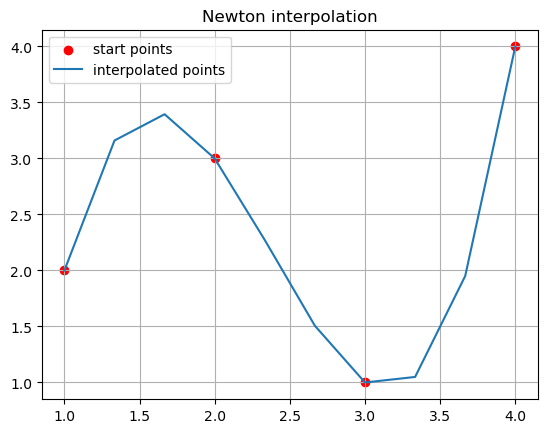

In [12]:
plt.scatter(x_values,y_values,color = 'red',label = 'start points')
plt.plot(x_ax,y_ax,label = 'interpolated points')
plt.grid()
plt.legend()
plt.title('Newton interpolation')
plt.show()

<h1>Lagrange Interpolation</h1>

$ l_{j}(x) = {\displaystyle \prod_{i=0, i{\neq}j}^{n} \frac{(x-x_{i})}{(x_{j} - x_{i})}}$

$ L(x) = {\displaystyle \sum_{i=0}^{n} y_{i}\cdot l_{i}(x) }$

In [13]:
def create_basic_polynomial(x_values, i):
    def basic_polynomial(x):
        divider = 1
        result = 1
        for j in range(len(x_values)):
            if j != i:
                result *= (x-x_values[j])
                divider *= (x_values[i]-x_values[j])
        return result/divider
    return basic_polynomial

In [14]:
def create_Lagrange_polynomial(x_values, y_values):
    basic_polynomials = []
    for i in range(len(x_values)):
        basic_polynomials.append(create_basic_polynomial(x_values, i))

    def lagrange_polynomial(x):
        result = 0
        for i in range(len(y_values)):
            result += y_values[i]*basic_polynomials[i](x)
        return result
    return lagrange_polynomial

In [15]:
# x_values = [-1.5,-1,-0.5,0,0.5]
# y_values = [1.125,0,0.125,0,1.125]

# x_values = [1,2,4,7]
# y_values = [2,3,1,4]

x_values = [1,2,4]
y_values = [1,8,64]

lag_pol = create_Lagrange_polynomial(x_values, y_values)
x_ax = np.linspace(x_values[0],x_values[-1],10)
#x_ax = [-1.5,-1,-0.5,0,0.5]
y_ax = [lag_pol(i) for i in x_ax]

for x,y in zip(x_ax,y_ax):
    print("x = {:.4f}\t y = {:4f}".format(x,y))

x = 1.0000	 y = 1.000000
x = 1.3333	 y = 1.777778
x = 1.6667	 y = 4.111111
x = 2.0000	 y = 8.000000
x = 2.3333	 y = 13.444444
x = 2.6667	 y = 20.444444
x = 3.0000	 y = 29.000000
x = 3.3333	 y = 39.111111
x = 3.6667	 y = 50.777778
x = 4.0000	 y = 64.000000


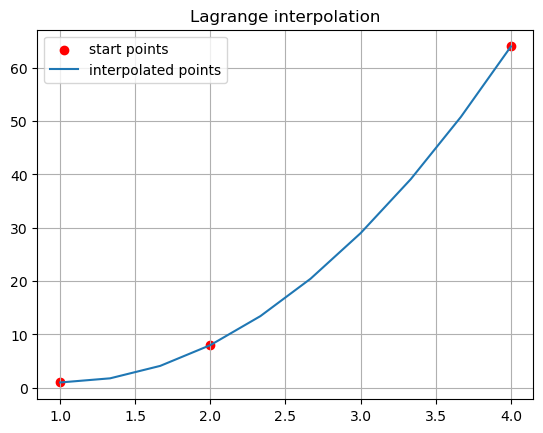

In [16]:
plt.scatter(x_values,y_values,color = 'red',label = 'start points')
plt.plot(x_ax,y_ax,label = 'interpolated points')
plt.grid()
plt.legend()
plt.title('Lagrange interpolation')
plt.show()